In [1]:
#importing libraries
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd
import urllib

In [2]:
#Football site that has been scraped
base_url = 'http://www.goal.com/en-gb'

In [3]:
#Using request library to get the URL
goaldotcom = requests.get(base_url)

In [4]:
#Check if the page has been scraped- we will get a response 200
goaldotcom

<Response [200]>

In [5]:
#Text Content of the page
page = urllib.request.urlopen('http://www.goal.com/en-gb').read()

In [6]:
page

b'<!DOCTYPE html> <html class="no-js" dir="ltr" lang="en" data-status-code="200"> <head> <script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var o=t[n]={exports:{}};e[n][0].call(o.exports,function(t){var o=e[n][1][t];return r(o||t)},o,o.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(e,t,n){function r(){}function o(e,t,n){return function(){return i(e,[f.now()].concat(u(arguments)),t?null:this,n),t?void 0:this}}var i=e("handle"),a=e(2),u=e(3),c=e("ee").get("tracer"),f=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],d="api-",l=d+"ixn-";a(p,function(e,t){s[t]=o(d+t,!0,"api")}),s.addPageAction=o(d+"addPageAction",!0),s.setCurrentRouteName=o(d+"routeName",!0),t.exports=newrelic,s.interaction=function(){return

In [7]:
#Creating soup using the library BeautifulSoup
soup = BeautifulSoup( page, 'html.parser')

In [8]:
#To see a structured form of soup
print (soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-status-code="200" dir="ltr" lang="en">
 <head>
  <script type="text/javascript">
   window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var o=t[n]={exports:{}};e[n][0].call(o.exports,function(t){var o=e[n][1][t];return r(o||t)},o,o.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(e,t,n){function r(){}function o(e,t,n){return function(){return i(e,[f.now()].concat(u(arguments)),t?null:this,n),t?void 0:this}}var i=e("handle"),a=e(2),u=e(3),c=e("ee").get("tracer"),f=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],d="api-",l=d+"ixn-";a(p,function(e,t){s[t]=o(d+t,!0,"api")}),s.addPageAction=o(d+"addPageAction",!0),s.setCurrentRouteName=o(d+"routeName",!0),t.exports=newrelic,s.interaction=function(){r

In [9]:
#Getting the news headline for each page
title_class = soup.select('div .title-wrapper')

In [10]:
len(title_class)

65

In [11]:
title_class[0:5] 

[<div class="title-wrapper"> <h3 itemprop="headline" title="Salah fit for World Cup as Egypt confirm three-week injury absence">Egypt confirm Salah will be fit for World Cup</h3> </div>,
 <div class="title-wrapper"> <h3 itemprop="headline" title="Salah fit for World Cup as Egypt confirm three-week injury absence">Egypt confirm Salah will be fit for World Cup</h3> </div>,
 <div class="title-wrapper"> <h3 itemprop="headline" title="Chelsea hold positive Sarri talks as Blues close in on new manager">Chelsea hold positive Sarri talks in Milan</h3> </div>,
 <div class="title-wrapper"> <h3 itemprop="headline" title="Chelsea hold positive Sarri talks as Blues close in on new manager">Chelsea hold positive Sarri talks in Milan</h3> </div>,
 <div class="title-wrapper"> <h3 itemprop="headline" title="'You can't take it anymore' - Iniesta opens up on struggle with depression">Iniesta 'couldn't take it anymore' amid depression</h3> </div>]

In [12]:
title_class[-1]

<div class="title-wrapper"> <h3 itemprop="headline" title="Mexico national team member Gallardo joins Rayados from Pumas">Gallardo joins Rayados from Pumas</h3> </div>

In [13]:
title_class = soup.select('div .title-wrapper h3')

In [14]:
len(title_class)

65

In [15]:
title_class[0]

<h3 itemprop="headline" title="Salah fit for World Cup as Egypt confirm three-week injury absence">Egypt confirm Salah will be fit for World Cup</h3>

In [16]:
title_class[0].get_text()

'Egypt confirm Salah will be fit for World Cup'

In [17]:
title_class[-1]

<h3 itemprop="headline" title="Mexico national team member Gallardo joins Rayados from Pumas">Gallardo joins Rayados from Pumas</h3>

In [18]:
title_class[-2]

<h3 itemprop="headline" title="Mexico national team member Gallardo joins Rayados from Pumas">Gallardo joins Rayados from Pumas</h3>

In [19]:
title_class[-3]

<h3 itemprop="headline" title="Salah fit for World Cup as Egypt confirm three-week injury absence">Egypt confirm Salah will be fit for World Cup</h3>

In [20]:
title_class = soup.select('div .title-wrapper > h3:nth-of-type(1)')

In [21]:
title_class[0].get_text()

'Egypt confirm Salah will be fit for World Cup'

In [22]:
df = pd.DataFrame(columns=['title'])
df.count()

title    0
dtype: int64

In [23]:
#Automate the scraping process
def get_data_from_goalcom(url):
    print(url)
    goaldotcom = requests.get(url)
    soup = BeautifulSoup(page ,'html.parser')
    title_class = soup.select('div .title-wrapper > h3:nth-of-type(1)')
    print(len(title_class))
    for i in range(len(title_class)-1):
        df.loc[df.shape[0]] = [title_class[i].get_text()]
    print('updated df with data')
    return title_class[len(title_class) - 1]

In [24]:
url = base_url
for i in range(0,6):
    more_url = get_data_from_goalcom(url)
    url = base_url

http://www.goal.com/en-gb
65
updated df with data
http://www.goal.com/en-gb
65
updated df with data
http://www.goal.com/en-gb
65
updated df with data
http://www.goal.com/en-gb
65
updated df with data
http://www.goal.com/en-gb
65
updated df with data
http://www.goal.com/en-gb
65
updated df with data


In [25]:
df.shape

(384, 1)

In [26]:
df.head()

,title
0,Egypt confirm Salah will be fit for World Cup
1,Egypt confirm Salah will be fit for World Cup
2,Chelsea hold positive Sarri talks in Milan
3,Chelsea hold positive Sarri talks in Milan
4,Iniesta 'couldn't take it anymore' amid depres...


In [27]:
a = df.drop_duplicates()
a

,title
0,Egypt confirm Salah will be fit for World Cup
2,Chelsea hold positive Sarri talks in Milan
4,Iniesta 'couldn't take it anymore' amid depres...
6,'I'd rather he joined Man Utd over PSG' - Rona...
8,Transfer latest: Kluivert reaches agreement to...
10,Aston Villa confirm Terry departure
12,Liverpool options to replace calamitous Karius
14,Man Utd hoping to sign €20m Dalot this week
16,Bale criticised for failing to learn Spanish
18,How Vela's LAFC move helped El Tri


In [28]:
a.head()

,title
0,Egypt confirm Salah will be fit for World Cup
2,Chelsea hold positive Sarri talks in Milan
4,Iniesta 'couldn't take it anymore' amid depres...
6,'I'd rather he joined Man Utd over PSG' - Rona...
8,Transfer latest: Kluivert reaches agreement to...


In [29]:
#Saving the headline in a csv file
a.to_csv('goal.csv', encoding = "utf8", index = False)

In [30]:
#Loading the data and importing libraries to visualize
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
%matplotlib inline

In [32]:
df = pd.read_csv('goal.csv')

In [33]:
df.head()

,title
0,Egypt confirm Salah will be fit for World Cup
1,Chelsea hold positive Sarri talks in Milan
2,Iniesta 'couldn't take it anymore' amid depres...
3,'I'd rather he joined Man Utd over PSG' - Rona...
4,Transfer latest: Kluivert reaches agreement to...


In [34]:
#Creating WordCloud
import nltk
from wordcloud import WordCloud

In [35]:
#Tokenization
sentence = df['title'][0]
sentence

'Egypt confirm Salah will be fit for World Cup'

In [36]:
tokens = nltk.wordpunct_tokenize(sentence)
tokens

['Egypt', 'confirm', 'Salah', 'will', 'be', 'fit', 'for', 'World', 'Cup']

In [37]:
frequency_words = {}

In [38]:
#Generating Frequency words
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token in frequency_words:
            count = frequency_words[token]
            count = count + 1
            frequency_words[token] = count
        else:
            frequency_words[token] = 1

In [39]:
#Frequency for each word occuring
frequency_words

{'&': 5,
 "'": 15,
 ',': 5,
 '-': 2,
 '15': 1,
 '2018': 2,
 '20m': 1,
 '23': 1,
 '30': 1,
 '40m': 1,
 '50': 1,
 ':': 6,
 'Arsenal': 1,
 'Aston': 1,
 'Austria': 1,
 'Bale': 1,
 'Best': 1,
 'Betting': 3,
 'Boosts': 1,
 'Brazil': 1,
 'Casillas': 1,
 'Champions': 1,
 'Chelsea': 1,
 'Chile': 1,
 'Coutinho': 1,
 'Cup': 5,
 'Daily': 1,
 'Dalot': 1,
 'Ebecilio': 1,
 'Egypt': 1,
 'El': 1,
 'Ex': 1,
 'Gallardo': 1,
 'Goal': 1,
 'Hamann': 1,
 'How': 1,
 'I': 3,
 'Iniesta': 1,
 'Italy': 1,
 'Karius': 2,
 'Kluivert': 1,
 'LAFC': 1,
 'League': 1,
 'Limited': 1,
 'Liverpool': 1,
 'Lopyreva': 1,
 'Luca': 1,
 'Madrid': 2,
 'Man': 3,
 'Messi': 2,
 'Milan': 1,
 'Netherlands': 1,
 'Neymar': 2,
 'Odriozola': 1,
 'PSG': 1,
 'Price': 1,
 'Pumas': 1,
 'Rayados': 1,
 'Real': 1,
 'Rob': 1,
 'Roma': 1,
 'Ronaldo': 4,
 'Russia': 1,
 'Salah': 2,
 'Sarri': 1,
 'Skriniar': 1,
 'Spanish': 1,
 'Stone': 1,
 'Terry': 1,
 'The': 2,
 'Tips': 1,
 'Transfer': 1,
 'Tri': 1,
 'Utd': 3,
 'Vela': 1,
 'Victoria': 1,
 'Video': 1,

In [40]:
#Creating WordCloud
wordcloud = WordCloud()

In [41]:
wordcloud.generate_from_frequencies(frequency_words)

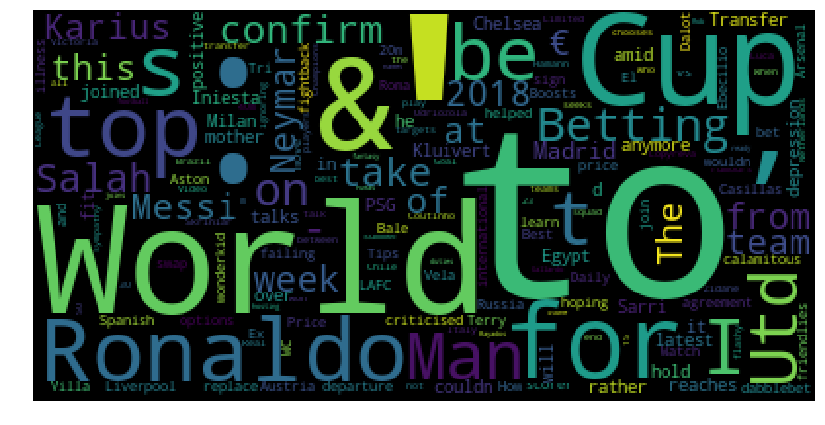

In [42]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [43]:
#Converting the dictionary to a DataFrame
freq = pd.DataFrame.from_dict(frequency_words, orient = 'index')

In [44]:
#Sorting the data in descensing order
freq.sort_values(by = 0, ascending=False).head(10)

,0
',15
to,7
:,6
",",5
World,5
Cup,5
&,5
top,4
for,4
Ronaldo,4


In [47]:
#Importing libraries for StopWord Removal
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords

In [46]:
stop = stopwords.words('english')

In [47]:
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [48]:
#Creating frequency words (Remove all the stop words in our count and making every word in lower case)
frequency_words_wo_stop = {}
for data in df['title']:
    tokens = nltk.wordpunct_tokenize(data)
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [49]:
wordcloud.generate_from_frequencies(frequency_words)

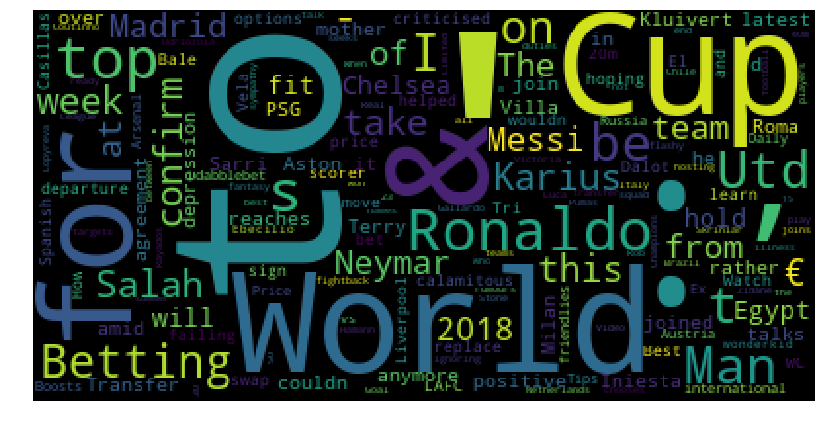

In [50]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [51]:
#Extending the stopword list with common punctuations 
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [52]:
frequency_words = {}

In [53]:
def generate_word_frequency(row):
    data = row['title']
    tokens = nltk.wordpunct_tokenize(data)
    token_list = []
    for token in tokens:
        if token.lower() not in stop:
            token_list.append(token.lower())
            if token.lower() in frequency_words:
                count = frequency_words[token.lower()]
                count = count + 1
                frequency_words[token.lower()] = count
            else:
                frequency_words[token.lower()] = 1
    
    return ','.join(token_list)

In [54]:
df['tokens'] = df.apply(generate_word_frequency,axis=1)

In [55]:
df.head()

,title,tokens
0,Egypt confirm Salah will be fit for World Cup,"egypt,confirm,salah,fit,world,cup"
1,Chelsea hold positive Sarri talks in Milan,"chelsea,hold,positive,sarri,talks,milan"
2,Iniesta 'couldn't take it anymore' amid depres...,"iniesta,take,anymore,amid,depression"
3,'I'd rather he joined Man Utd over PSG' - Rona...,"rather,joined,man,utd,psg,ronaldo,mother"
4,Transfer latest: Kluivert reaches agreement to...,"transfer,latest,kluivert,reaches,agreement,joi..."


In [56]:
wordcloud.generate_from_frequencies(frequency_words)

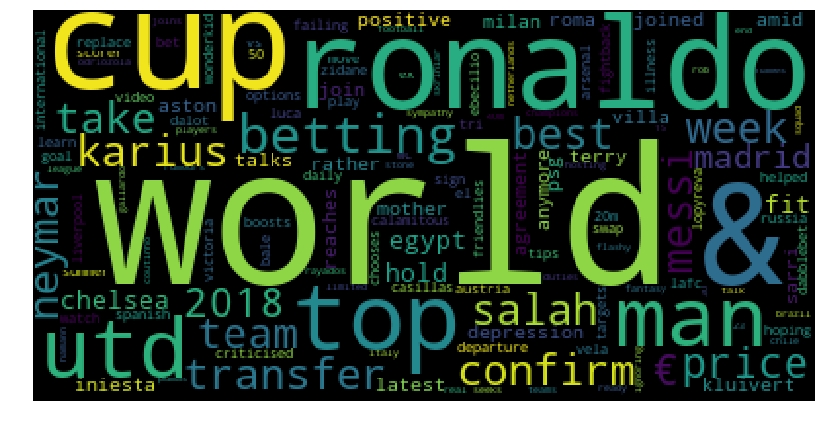

In [57]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [58]:
#Importing libraries for stemming
from nltk.stem.porter import PorterStemmer

In [59]:
porter_stemmer = PorterStemmer()

In [60]:
porter_stemmer.stem('dividing')

'divid'

In [165]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
#Importing libraries for Lemmatization
from nltk.stem import WordNetLemmatizer

In [62]:
wordnet_lemmatizer = WordNetLemmatizer()

In [63]:
wordnet_lemmatizer.lemmatize('are')

'are'

In [64]:
wordnet_lemmatizer.lemmatize('is')

'is'

In [65]:
wordnet_lemmatizer.lemmatize('dividing', pos = "v")

'divide'

In [66]:
wordnet_lemmatizer.lemmatize('is',pos='v')

'be'

In [67]:
def stem_title(data):
    return porter_stemmer.stem(data['title'])

In [68]:
def lemmatize_title(data):
    return wordnet_lemmatizer.lemmatize(data['title'])

In [69]:
df['stem'] = df.apply(stem_title,axis=1)

In [70]:
df.head()

,title,tokens,stem
0,Egypt confirm Salah will be fit for World Cup,"egypt,confirm,salah,fit,world,cup",egypt confirm salah will be fit for world cup
1,Chelsea hold positive Sarri talks in Milan,"chelsea,hold,positive,sarri,talks,milan",chelsea hold positive sarri talks in milan
2,Iniesta 'couldn't take it anymore' amid depres...,"iniesta,take,anymore,amid,depression",iniesta 'couldn't take it anymore' amid depress
3,'I'd rather he joined Man Utd over PSG' - Rona...,"rather,joined,man,utd,psg,ronaldo,mother",'i'd rather he joined man utd over psg' - rona...
4,Transfer latest: Kluivert reaches agreement to...,"transfer,latest,kluivert,reaches,agreement,joi...",transfer latest: kluivert reaches agreement to...


In [71]:
df['lemma'] = df.apply(lemmatize_title, axis=1)

In [72]:
df.head()

,title,tokens,stem,lemma
0,Egypt confirm Salah will be fit for World Cup,"egypt,confirm,salah,fit,world,cup",egypt confirm salah will be fit for world cup,Egypt confirm Salah will be fit for World Cup
1,Chelsea hold positive Sarri talks in Milan,"chelsea,hold,positive,sarri,talks,milan",chelsea hold positive sarri talks in milan,Chelsea hold positive Sarri talks in Milan
2,Iniesta 'couldn't take it anymore' amid depres...,"iniesta,take,anymore,amid,depression",iniesta 'couldn't take it anymore' amid depress,Iniesta 'couldn't take it anymore' amid depres...
3,'I'd rather he joined Man Utd over PSG' - Rona...,"rather,joined,man,utd,psg,ronaldo,mother",'i'd rather he joined man utd over psg' - rona...,'I'd rather he joined Man Utd over PSG' - Rona...
4,Transfer latest: Kluivert reaches agreement to...,"transfer,latest,kluivert,reaches,agreement,joi...",transfer latest: kluivert reaches agreement to...,Transfer latest: Kluivert reaches agreement to...


In [73]:
df.tail()

,title,tokens,stem,lemma
24,Odriozola ignoring €40m Real Madrid rumours,"odriozola,ignoring,€,40m,real,madrid,rumours",odriozola ignoring €40m real madrid rumour,Odriozola ignoring €40m Real Madrid rumours
25,Hamann: Limited sympathy for flashy Karius,"hamann,limited,sympathy,flashy,karius",hamann: limited sympathy for flashy kariu,Hamann: Limited sympathy for flashy Karius
26,The top 30 fantasy football team names,"top,30,fantasy,football,team,names",the top 30 fantasy football team nam,The top 30 fantasy football team names
27,Rob Stone ready to take on World Cup hosting d...,"rob,stone,ready,take,world,cup,hosting,duties",rob stone ready to take on world cup hosting duti,Rob Stone ready to take on World Cup hosting d...
28,Gallardo joins Rayados from Pumas,"gallardo,joins,rayados,pumas",gallardo joins rayados from puma,Gallardo joins Rayados from Pumas


In [83]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [74]:
#Parts-of-Speech tagging
def get_pos_tags(data):
    return nltk.pos_tag(nltk.wordpunct_tokenize(data['title']))

In [75]:
#Generating POS tags for each title
df['pos_tags'] = df.apply(get_pos_tags,axis=1)

In [76]:
df.head()

,title,tokens,stem,lemma,pos_tags
0,Egypt confirm Salah will be fit for World Cup,"egypt,confirm,salah,fit,world,cup",egypt confirm salah will be fit for world cup,Egypt confirm Salah will be fit for World Cup,"[(Egypt, NNP), (confirm, NN), (Salah, NNP), (w..."
1,Chelsea hold positive Sarri talks in Milan,"chelsea,hold,positive,sarri,talks,milan",chelsea hold positive sarri talks in milan,Chelsea hold positive Sarri talks in Milan,"[(Chelsea, NNP), (hold, VBP), (positive, JJ), ..."
2,Iniesta 'couldn't take it anymore' amid depres...,"iniesta,take,anymore,amid,depression",iniesta 'couldn't take it anymore' amid depress,Iniesta 'couldn't take it anymore' amid depres...,"[(Iniesta, NNP), (', POS), (couldn, NN), (', '..."
3,'I'd rather he joined Man Utd over PSG' - Rona...,"rather,joined,man,utd,psg,ronaldo,mother",'i'd rather he joined man utd over psg' - rona...,'I'd rather he joined Man Utd over PSG' - Rona...,"[(', ''), (I, PRP), (', POS), (d, NN), (rather..."
4,Transfer latest: Kluivert reaches agreement to...,"transfer,latest,kluivert,reaches,agreement,joi...",transfer latest: kluivert reaches agreement to...,Transfer latest: Kluivert reaches agreement to...,"[(Transfer, NN), (latest, JJS), (:, :), (Kluiv..."


In [77]:
df.pos_tags[0]

[('Egypt', 'NNP'),
 ('confirm', 'NN'),
 ('Salah', 'NNP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('fit', 'VBN'),
 ('for', 'IN'),
 ('World', 'NNP'),
 ('Cup', 'NNP')]

In [88]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [78]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [79]:
#Chunking
ne_tree = nltk.ne_chunk(df.pos_tags[0],binary=True)

In [80]:
for x in ne_tree:
    print(type(x),x)
    if type(x) == nltk.tree.Tree:
        if(x.label()) == 'NE':
            print(x)

<class 'nltk.tree.Tree'> (NE Egypt/NNP)
(NE Egypt/NNP)
<class 'tuple'> ('confirm', 'NN')
<class 'nltk.tree.Tree'> (NE Salah/NNP)
(NE Salah/NNP)
<class 'tuple'> ('will', 'MD')
<class 'tuple'> ('be', 'VB')
<class 'tuple'> ('fit', 'VBN')
<class 'tuple'> ('for', 'IN')
<class 'tuple'> ('World', 'NNP')
<class 'tuple'> ('Cup', 'NNP')


In [81]:

def get_entities(row):
    entities=[]
    chunked_tree = nltk.ne_chunk(row.pos_tags,binary=True)
    for nodes in chunked_tree:
        if type(nodes) == nltk.tree.Tree:
            if(nodes.label()) == 'NE':
                print("Before zip",nodes.leaves())
                zipped_list = list(zip(*nodes.leaves()))
                print("After zip",zipped_list)
                entities.append(' '.join(zipped_list[0]))
    return entities

In [82]:
df['named_entities'] = df.apply(get_entities,axis=1)

Before zip [('Egypt', 'NNP')]
After zip [('Egypt',), ('NNP',)]
Before zip [('Salah', 'NNP')]
After zip [('Salah',), ('NNP',)]
Before zip [('Chelsea', 'NNP')]
After zip [('Chelsea',), ('NNP',)]
Before zip [('Milan', 'NNP')]
After zip [('Milan',), ('NNP',)]
Before zip [('Iniesta', 'NNP')]
After zip [('Iniesta',), ('NNP',)]
Before zip [('Man', 'NNP'), ('Utd', 'NNP')]
After zip [('Man', 'Utd'), ('NNP', 'NNP')]
Before zip [('PSG', 'NNP')]
After zip [('PSG',), ('NNP',)]
Before zip [('Ronaldo', 'NNP')]
After zip [('Ronaldo',), ('NNP',)]
Before zip [('Transfer', 'NN')]
After zip [('Transfer',), ('NN',)]
Before zip [('Roma', 'NNP')]
After zip [('Roma',), ('NNP',)]
Before zip [('Aston', 'NNP'), ('Villa', 'NNP')]
After zip [('Aston', 'Villa'), ('NNP', 'NNP')]
Before zip [('Terry', 'NNP')]
After zip [('Terry',), ('NNP',)]
Before zip [('Liverpool', 'NN')]
After zip [('Liverpool',), ('NN',)]
Before zip [('Man', 'NNP'), ('Utd', 'NNP')]
After zip [('Man', 'Utd'), ('NNP', 'NNP')]
Before zip [('Bale', '

In [83]:
df.head()

,title,tokens,stem,lemma,pos_tags,named_entities
0,Egypt confirm Salah will be fit for World Cup,"egypt,confirm,salah,fit,world,cup",egypt confirm salah will be fit for world cup,Egypt confirm Salah will be fit for World Cup,"[(Egypt, NNP), (confirm, NN), (Salah, NNP), (w...","[Egypt, Salah]"
1,Chelsea hold positive Sarri talks in Milan,"chelsea,hold,positive,sarri,talks,milan",chelsea hold positive sarri talks in milan,Chelsea hold positive Sarri talks in Milan,"[(Chelsea, NNP), (hold, VBP), (positive, JJ), ...","[Chelsea, Milan]"
2,Iniesta 'couldn't take it anymore' amid depres...,"iniesta,take,anymore,amid,depression",iniesta 'couldn't take it anymore' amid depress,Iniesta 'couldn't take it anymore' amid depres...,"[(Iniesta, NNP), (', POS), (couldn, NN), (', '...",[Iniesta]
3,'I'd rather he joined Man Utd over PSG' - Rona...,"rather,joined,man,utd,psg,ronaldo,mother",'i'd rather he joined man utd over psg' - rona...,'I'd rather he joined Man Utd over PSG' - Rona...,"[(', ''), (I, PRP), (', POS), (d, NN), (rather...","[Man Utd, PSG, Ronaldo]"
4,Transfer latest: Kluivert reaches agreement to...,"transfer,latest,kluivert,reaches,agreement,joi...",transfer latest: kluivert reaches agreement to...,Transfer latest: Kluivert reaches agreement to...,"[(Transfer, NN), (latest, JJS), (:, :), (Kluiv...","[Transfer, Roma]"


In [84]:
df.tail()

,title,tokens,stem,lemma,pos_tags,named_entities
24,Odriozola ignoring €40m Real Madrid rumours,"odriozola,ignoring,€,40m,real,madrid,rumours",odriozola ignoring €40m real madrid rumour,Odriozola ignoring €40m Real Madrid rumours,"[(Odriozola, NNP), (ignoring, VBG), (€, RB), (...","[Odriozola, Madrid]"
25,Hamann: Limited sympathy for flashy Karius,"hamann,limited,sympathy,flashy,karius",hamann: limited sympathy for flashy kariu,Hamann: Limited sympathy for flashy Karius,"[(Hamann, NN), (:, :), (Limited, VBN), (sympat...",[Hamann]
26,The top 30 fantasy football team names,"top,30,fantasy,football,team,names",the top 30 fantasy football team nam,The top 30 fantasy football team names,"[(The, DT), (top, JJ), (30, CD), (fantasy, NN)...",[]
27,Rob Stone ready to take on World Cup hosting d...,"rob,stone,ready,take,world,cup,hosting,duties",rob stone ready to take on world cup hosting duti,Rob Stone ready to take on World Cup hosting d...,"[(Rob, NNP), (Stone, NNP), (ready, JJ), (to, T...",[Rob Stone]
28,Gallardo joins Rayados from Pumas,"gallardo,joins,rayados,pumas",gallardo joins rayados from puma,Gallardo joins Rayados from Pumas,"[(Gallardo, NNP), (joins, VBZ), (Rayados, NNP)...","[Gallardo, Rayados, Pumas]"


In [85]:
#Saving the data in a CSV file
df.to_csv('goal1.csv', encoding = "utf8", index=False)

In [86]:
#Model the data
#Preprocess the data
import pandas as pd
import re

In [87]:
df = pd.read_csv('goal1.csv')

In [88]:
df.head()

,title,tokens,stem,lemma,pos_tags,named_entities
0,Egypt confirm Salah will be fit for World Cup,"egypt,confirm,salah,fit,world,cup",egypt confirm salah will be fit for world cup,Egypt confirm Salah will be fit for World Cup,"[('Egypt', 'NNP'), ('confirm', 'NN'), ('Salah'...","['Egypt', 'Salah']"
1,Chelsea hold positive Sarri talks in Milan,"chelsea,hold,positive,sarri,talks,milan",chelsea hold positive sarri talks in milan,Chelsea hold positive Sarri talks in Milan,"[('Chelsea', 'NNP'), ('hold', 'VBP'), ('positi...","['Chelsea', 'Milan']"
2,Iniesta 'couldn't take it anymore' amid depres...,"iniesta,take,anymore,amid,depression",iniesta 'couldn't take it anymore' amid depress,Iniesta 'couldn't take it anymore' amid depres...,"[('Iniesta', 'NNP'), (""'"", 'POS'), ('couldn', ...",['Iniesta']
3,'I'd rather he joined Man Utd over PSG' - Rona...,"rather,joined,man,utd,psg,ronaldo,mother",'i'd rather he joined man utd over psg' - rona...,'I'd rather he joined Man Utd over PSG' - Rona...,"[(""'"", ""''""), ('I', 'PRP'), (""'"", 'POS'), ('d'...","['Man Utd', 'PSG', 'Ronaldo']"
4,Transfer latest: Kluivert reaches agreement to...,"transfer,latest,kluivert,reaches,agreement,joi...",transfer latest: kluivert reaches agreement to...,Transfer latest: Kluivert reaches agreement to...,"[('Transfer', 'NN'), ('latest', 'JJS'), (':', ...","['Transfer', 'Roma']"


In [89]:
df.shape

(29, 6)

In [90]:
import nltk

In [91]:
from nltk.corpus import stopwords

In [92]:
stop = stopwords.words('english')

In [93]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [94]:
tokens_list = df['tokens'].tolist()

In [95]:
tokens_list

['egypt,confirm,salah,fit,world,cup',
 'chelsea,hold,positive,sarri,talks,milan',
 'iniesta,take,anymore,amid,depression',
 'rather,joined,man,utd,psg,ronaldo,mother',
 'transfer,latest,kluivert,reaches,agreement,join,roma',
 'aston,villa,confirm,terry,departure',
 'liverpool,options,replace,calamitous,karius',
 'man,utd,hoping,sign,€,20m,dalot,week',
 'bale,criticised,failing,learn,spanish',
 'vela,lafc,move,helped,el,tri',
 'casillas,swap,ronaldo,neymar',
 'betting,best,price,messi,wc,top,scorer',
 'watch,bet,international,friendlies,week',
 'betting,tips,austria,vs,russia',
 'betting,daily,world,cup,price,boosts,dabblebet',
 'ex,arsenal,wonderkid,ebecilio,fightback,illness',
 'victoria,lopyreva,chooses,messi,&,ronaldo',
 'play,luca,zidane',
 'goal,video',
 'top,50,summer,transfer,targets,2018',
 'salah,ronaldo,&,best,team,champions,league',
 'italy,netherlands,chile,&,15,top,teams,world,cup,2018',
 'brazil,world,cup,squad,neymar,coutinho,&,23,players',
 'skriniar,seeks,end,man,utd,&

In [96]:
#Getting the frequency count
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['egypt', 'confirm', 'salah', 'fit', 'world', 'cup']
['chelsea', 'hold', 'positive', 'sarri', 'talks', 'milan']
['iniesta', 'take', 'anymore', 'amid', 'depression']
['rather', 'joined', 'man', 'utd', 'psg', 'ronaldo', 'mother']
['transfer', 'latest', 'kluivert', 'reaches', 'agreement', 'join', 'roma']
['aston', 'villa', 'confirm', 'terry', 'departure']
['liverpool', 'options', 'replace', 'calamitous', 'karius']
['man', 'utd', 'hoping', 'sign', '€', '20m', 'dalot', 'week']
['bale', 'criticised', 'failing', 'learn', 'spanish']
['vela', 'lafc', 'move', 'helped', 'el', 'tri']
['casillas', 'swap', 'ronaldo', 'neymar']
['betting', 'best', 'price', 'messi', 'wc', 'top', 'scorer']
['watch', 'bet', 'international', 'friendlies', 'week']
['betting', 'tips', 'austria', 'vs', 'russia']
['betting', 'daily', 'world', 'cup', 'price', 'boosts', 'dabblebet']
['ex', 'arsenal', 'wonderkid', 'ebecilio', 'fightback', 'illness']
['victoria', 'lopyreva', 'chooses', 'messi', '&', 'ronaldo']
['play', 'luca', '

In [97]:
#Generating Term Frequency and Inverse Term Frequency
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [98]:
df_tfidf.head()

,word,tf
0,egypt,1
1,confirm,2
2,salah,2
3,fit,1
4,world,5


In [99]:
df_tfidf.sort_values(ascending=False, by = "tf", inplace=True)

In [100]:
df_tfidf.head()

,word,tf
4,world,5
5,cup,5
87,&,5
22,ronaldo,4
65,top,4


In [101]:
#In how many documents (each title) does the word occur 
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [102]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [103]:
df_tfidf.head()

,word,tf,document_count
4,world,5,5
5,cup,5,5
87,&,5,5
22,ronaldo,4,4
65,top,4,4


In [104]:
df_tfidf.tail()

,word,tf,document_count
46,bale,1,1
44,dalot,1,1
43,20m,1,1
41,sign,1,1
136,pumas,1,1


In [105]:
total_docs = df.shape[0]

In [106]:
total_docs

29

In [107]:
#Computing libraries for counting TF-IDF
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [109]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [110]:
df_tfidf.head()

,word,tf,document_count,tfidf
4,world,5,5,3.817140
5,cup,5,5,3.817140
87,&,5,5,3.817140
22,ronaldo,4,4,3.441352
65,top,4,4,3.441352


In [111]:
df_tfidf.tail()

,word,tf,document_count,tfidf
46,bale,1,1,1.462398
44,dalot,1,1,1.462398
43,20m,1,1,1.462398
41,sign,1,1,1.462398
136,pumas,1,1,1.462398


In [112]:
df_tfidf.sort_values(by='tfidf',ascending=True,inplace=True)

In [113]:
df_tfidf.head()

,word,tf,document_count,tfidf
114,talk,1,1,1.462398
11,milan,1,1,1.462398
12,iniesta,1,1,1.462398
14,anymore,1,1,1.462398
15,amid,1,1,1.462398


In [114]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [115]:
df_tfidf.tail()

,word,tf,document_count,tfidf
65,top,4,4,3.441352
22,ronaldo,4,4,3.441352
87,&,5,5,3.817140
5,cup,5,5,3.817140
4,world,5,5,3.817140


In [116]:
df_tfidf.set_index('word', inplace=True)

In [117]:
df_tfidf.head()

,tf,document_count,tfidf
word,,,
talk,1,1,1.462398
milan,1,1,1.462398
iniesta,1,1,1.462398
anymore,1,1,1.462398
amid,1,1,1.462398


In [118]:
wordcloud = WordCloud()

In [119]:
word_tfidf = df_tfidf['tfidf'].to_dict()

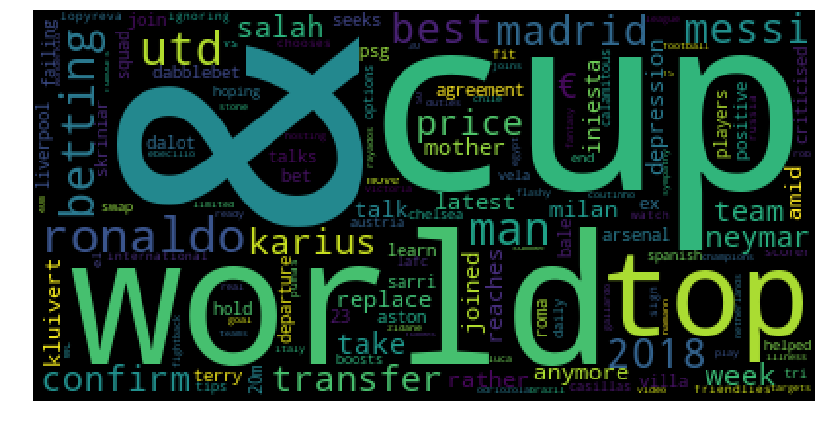

In [121]:
wordcloud.generate_from_frequencies(word_tfidf)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [122]:
#Topic Modelling by Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation

In [123]:
import numpy as np

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
import sklearn.feature_extraction.text as text

In [126]:
from sklearn.datasets import fetch_20newsgroups

In [127]:
#Getting the Document Term Matrix
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [128]:
dtm =  vectorizer.fit_transform(df.title).toarray()

In [129]:
dtm

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [130]:
#Loading the Vocabulary
vocab = np.array(vectorizer.get_feature_names())

In [131]:
vocab[:20]

array(['15', '2018', '20m', '23', '30', '40m', '50', 'agreement', 'amid',
       'anymore', 'arsenal', 'aston', 'austria', 'bale', 'best', 'bet',
       'betting', 'boosts', 'brazil', 'calamitous'],
      dtype='<U13')

In [132]:
titles = df.title

In [133]:
model = LatentDirichletAllocation(n_topics=5, max_iter=500, random_state=1)

In [134]:
model.fit(dtm)

C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_components=10, n_jobs=1, n_topics=5,
             perp_tol=0.1, random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [135]:
model.components_

array([[ 0.20000482,  1.19967402,  0.20000505,  0.20000761,  0.20001189,
         0.20000979,  1.19997357,  0.2000086 ,  0.20000827,  0.20000822,
         0.20000683,  0.20000731,  0.20000697,  1.19997382,  0.20001642,
         0.20000823,  0.20001495,  0.20000852,  0.20000762,  0.20000698,
         1.19997348,  0.20000641,  0.20000591,  0.20000476,  1.19997351,
         1.20007628,  0.20000824,  0.20000765,  1.1999738 ,  1.19858357,
         0.20000851,  0.20000853,  0.20000507,  0.20000735,  0.20000825,
         0.20000851,  0.20000686,  1.19997736,  0.2000119 ,  0.20000494,
         0.20000683,  1.19997381,  0.20001185,  0.20000679,  1.19997733,
         0.20001186,  0.20001184,  0.20000824,  0.20001041,  0.20003207,
         0.20001185,  0.20001187,  0.20000591,  0.20000505,  0.20000851,
         0.20000981,  0.20000682,  0.20000827,  0.20000822,  0.20000478,
         0.20000866,  0.20000609,  0.20001038,  0.20001866,  0.20000865,
         0.20001181,  0.20000864,  0.20000637,  1.1

In [136]:
 model.components_

array([[ 0.20000482,  1.19967402,  0.20000505,  0.20000761,  0.20001189,
         0.20000979,  1.19997357,  0.2000086 ,  0.20000827,  0.20000822,
         0.20000683,  0.20000731,  0.20000697,  1.19997382,  0.20001642,
         0.20000823,  0.20001495,  0.20000852,  0.20000762,  0.20000698,
         1.19997348,  0.20000641,  0.20000591,  0.20000476,  1.19997351,
         1.20007628,  0.20000824,  0.20000765,  1.1999738 ,  1.19858357,
         0.20000851,  0.20000853,  0.20000507,  0.20000735,  0.20000825,
         0.20000851,  0.20000686,  1.19997736,  0.2000119 ,  0.20000494,
         0.20000683,  1.19997381,  0.20001185,  0.20000679,  1.19997733,
         0.20001186,  0.20001184,  0.20000824,  0.20001041,  0.20003207,
         0.20001185,  0.20001187,  0.20000591,  0.20000505,  0.20000851,
         0.20000981,  0.20000682,  0.20000827,  0.20000822,  0.20000478,
         0.20000866,  0.20000609,  0.20001038,  0.20001866,  0.20000865,
         0.20001181,  0.20000864,  0.20000637,  1.1

In [137]:
#Finding the key words that come together for each topic
n_top_words = 8

In [138]:
for i, topic_dist in enumerate(model.components_):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: ronaldo messi transfer neymar confirm egypt fit
Topic 1: utd man karius madrid seeks end talk
Topic 2: world cup betting price 23 brazil squad
Topic 3: team best week salah sign 20m hoping
Topic 4: 2018 teams netherlands chile italy 15 won


In [139]:
#Finding the topic for each document
for idx, topic in enumerate(model.components_):
    print ('Topic #%d:' % idx)
    print (' '.join ([vocab[i] for i in topic.argsort()[:-10 -1:-1]]))

Topic #0:
ronaldo messi transfer neymar confirm egypt fit bale failing criticised
Topic #1:
utd man karius madrid seeks end talk skriniar psg joined
Topic #2:
world cup betting price 23 brazil squad players coutinho rob
Topic #3:
team best week salah sign 20m hoping dalot sarri talks
Topic #4:
2018 teams netherlands chile italy 15 won ebecilio illness arsenal


In [140]:
doc_topic = model.components_

In [141]:
for n in range(5):
    topic_most_pr = model.components_[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,titles[n]))

topic: 96 , Egypt confirm Salah will be fit for World Cup
topic: 120 , Chelsea hold positive Sarri talks in Milan
topic: 131 , Iniesta 'couldn't take it anymore' amid depression
topic: 114 , 'I'd rather he joined Man Utd over PSG' - Ronaldo's mother
topic: 1 , Transfer latest: Kluivert reaches agreement to join Roma


In [142]:
#Performing Non Negative Matrix Factorization
from sklearn.decomposition import NMF

In [143]:
nmf = NMF(n_components = 20,
         random_state = 1,
         alpha = .1,
         l1_ratio = .5)

In [144]:
nmf.fit(dtm)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=20, random_state=1, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [145]:
 for idx, topic in enumerate(nmf.components_):
    print ('Topic #%d:' % idx)
    print (' '.join ([vocab[i] for i in topic.argsort()[:-10 -1:-1]]))

Topic #0:
world cup neymar brazil coutinho 23 players squad fit egypt
Topic #1:
utd man end seeks skriniar talk dalot 20m sign hoping
Topic #2:
price betting messi scorer wc best daily boosts dabblebet world
Topic #3:
ronaldo victoria chooses lopyreva messi swap wouldn casillas neymar joined
Topic #4:
latest agreement roma reaches transfer kluivert join international flashy duties
Topic #5:
world cup 15 teams 2018 won italy netherlands chile fit
Topic #6:
madrid rumours 40m ignoring odriozola real seeks end talk skriniar
Topic #7:
salah best ronaldo champions team league egypt fit confirm joined
Topic #8:
talks sarri positive chelsea hold milan zidane fantasy fit fightback
Topic #9:
karius options liverpool replace calamitous flashy sympathy limited hamann fantasy
Topic #10:
wonderkid ebecilio fightback ex arsenal illness zidane fantasy football flashy
Topic #11:
week bet watch friendlies international sign hoping dalot 20m italy
Topic #12:
confirm villa departure terry aston fit egypt

In [146]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import nltk
from nltk.corpus import stopwords
import gensim
from gensim import corpora, models

C:\Users\DELL\Anaconda3\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [147]:
pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [148]:
df = pd.read_csv('goal.csv')

In [149]:
print(df['title'].head(5))

0        Egypt confirm Salah will be fit for World Cup
1           Chelsea hold positive Sarri talks in Milan
2    Iniesta 'couldn't take it anymore' amid depres...
3    'I'd rather he joined Man Utd over PSG' - Rona...
4    Transfer latest: Kluivert reaches agreement to...
Name: title, dtype: object


In [150]:
texts = []
for i in df['title'].iteritems():
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [raw for raw in tokens if not raw in stop]
    new_stopped_tokens = [raw for raw in stopped_tokens if not raw in stop]
    lemma_tokens = [lemmatizer.lemmatize(tokens) for tokens in new_stopped_tokens]
    new_lemma_tokens = [raw for raw in lemma_tokens if not len(raw) == 1]
    texts.append(new_lemma_tokens)
print(texts[0])

['egypt', 'confirm', 'salah', 'fit', 'world', 'cup']


In [151]:
print(texts[1])

['chelsea', 'hold', 'positive', 'sarri', 'talk', 'milan']


In [152]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [153]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=20)
import pprint
pprint.pprint(ldamodel.top_topics(corpus,topn=5))

[([(0.074766353, 'dalot'),
   (0.074766353, 'hoping'),
   (0.074766353, 'week'),
   (0.074766353, 'utd'),
   (0.074766353, 'sign')],
  -0.24849066494980013),
 ([(0.080402017, 'madrid'),
   (0.080402009, 'real'),
   (0.080402009, 'odriozola'),
   (0.080402009, 'ignoring'),
   (0.080402009, 'rumour')],
  -0.27725887219497819),
 ([(0.080402002, 'karius'),
   (0.080401994, 'calamitous'),
   (0.080401994, 'replace'),
   (0.080401994, 'option'),
   (0.080401994, 'liverpool')],
  -0.27725887219497819),
 ([(0.074766345, 'best'),
   (0.074766345, 'league'),
   (0.074766345, 'champion'),
   (0.074766345, 'ronaldo'),
   (0.074766345, 'team')],
  -0.41588830830696721),
 ([(0.078680195, 'world'),
   (0.078680195, 'cup'),
   (0.040609136, 'boost'),
   (0.040609136, 'brazil'),
   (0.040609136, 'dabblebet')],
  -5.818407804627995),
 ([(0.055363309, 'learn'),
   (0.055363309, 'failing'),
   (0.055363309, 'criticised'),
   (0.055363309, 'bale'),
   (0.055363309, 'talk')],
  -9.7054901143594297),
 ([(0.0